ADF Test Results: {'ADF Statistic': -0.9142640570230041, 'p-value': 0.7832387728520942, 'Critical Values': {'1%': -3.4357346726088136, '5%': -2.863917819294165, '10%': -2.568035988607032}}


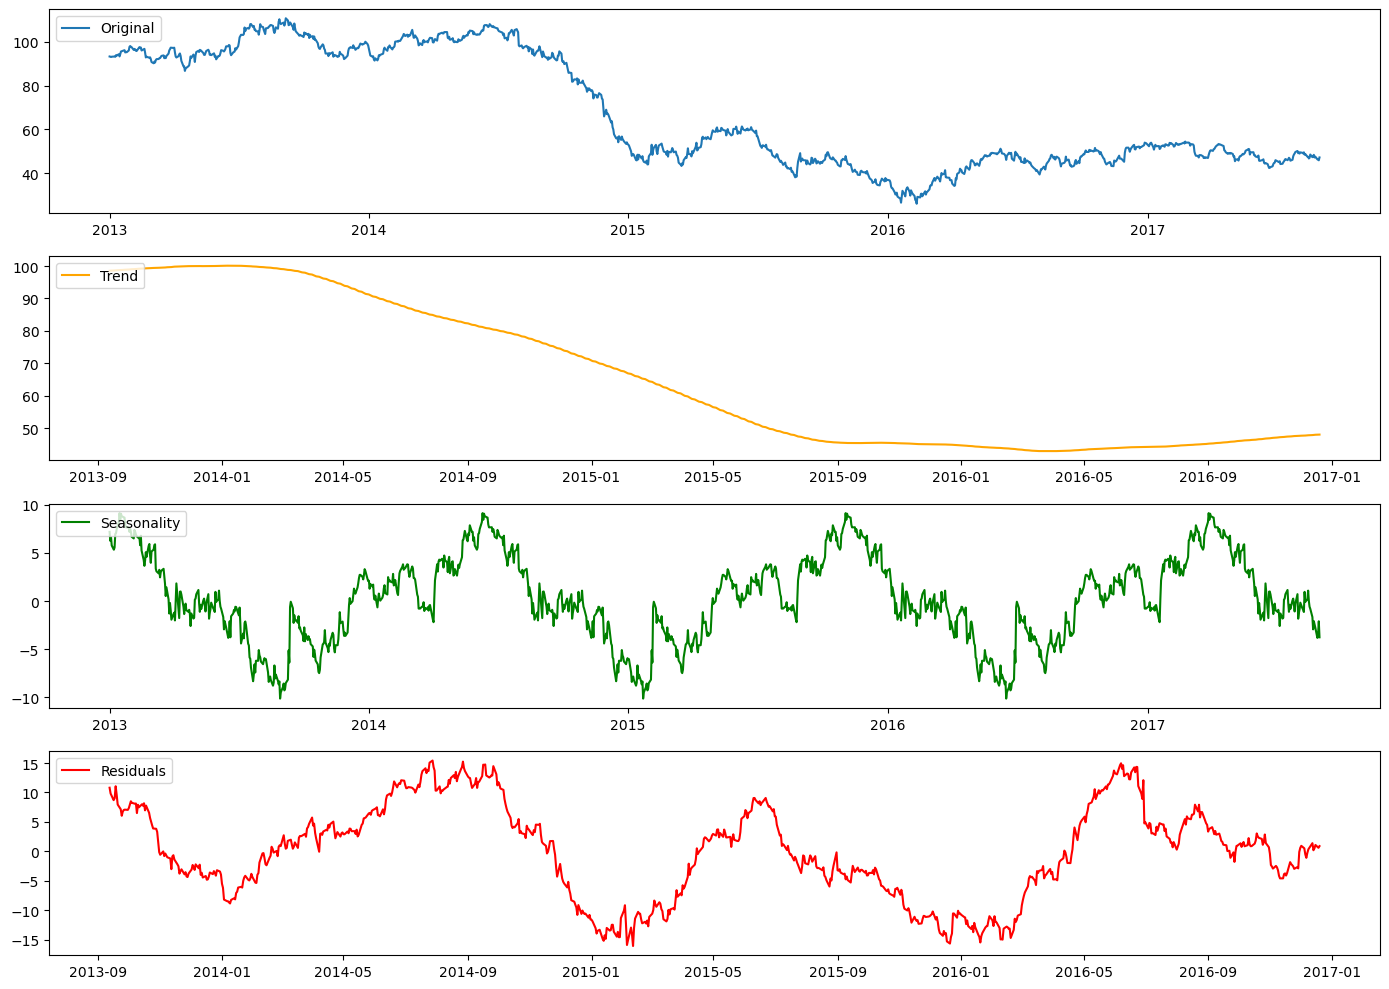

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Load the dataset
data = pd.read_csv('oil.csv')

# Convert 'date' column to datetime and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Interpolate missing values in 'oil' column
data['oil'] = data['oil'].interpolate(method='time')

# Perform decomposition
decomposition = seasonal_decompose(data['oil'], model='additive', period=365)

# Perform ADF test
adf_test = adfuller(data['oil'].dropna())
adf_results = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Critical Values": adf_test[4]
}
print("ADF Test Results:", adf_results)

# Plot decomposition results
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(data['oil'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
